In [1]:
import pymongo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cliente = pymongo.MongoClient("mongodb://localhost:27017/");
bd = cliente["ecobicis"]
coleccion = bd["bicis"]

In [3]:
pipe1 = [
      { '$group': 
          {'_id':  
            {'hour': {'$convert': { 'input': {'$arrayElemAt':[{'$split': ['$depHour', ':']}, 0]}, 'to': "int" }}},
            'trips': { '$sum': 1 }
          }
      },
      {'$sort':{'_id.hour':1}}
    ]

In [4]:
doc = coleccion.aggregate(pipeline = pipe1) 

In [5]:
yAxis = []
for x in range(1, 5):
    yAxis.append(0)

for x in doc:
    #print(x)
    yAxis.append(x.get('trips'))
    
inicio = yAxis[4]
yAxis[0] = inicio
yAxis[4] = 0


In [6]:
def plot(x, xlabel, y, ylabel, title, dpi):
    fig, ax = plt.subplots(figsize=(10, 5), dpi = dpi)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(x, y, 'bo-')
    plt.grid(True)
    plt.xticks(x)
       

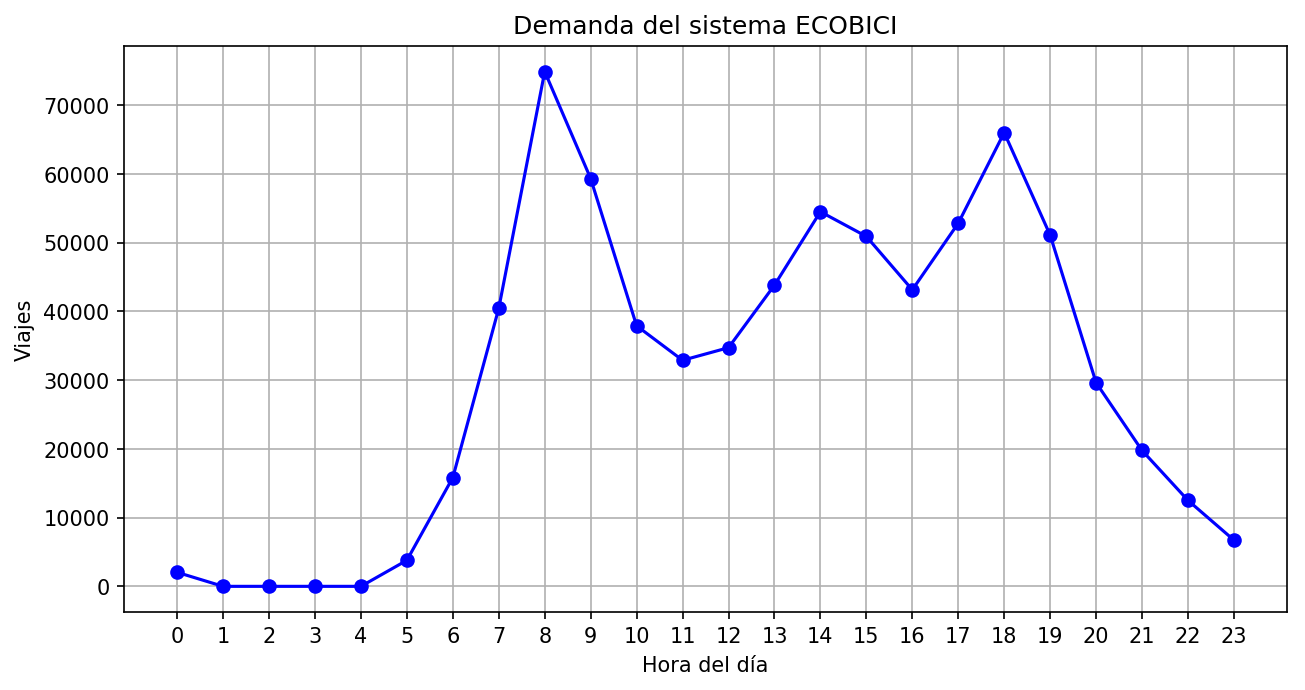

In [7]:
xAxis = np.arange(0, 24, 1)

plot(xAxis, "Hora del día", yAxis, "Viajes","Demanda del sistema ECOBICI", 150)

In [8]:
pipe2 = [
    {
      '$bucket':{
        'groupBy' : "$userAge", 
        'boundaries':[16,31,46,61,76], 
        'default':"other", 
        'output' :{
              "total" : {'$sum' : 1}, 
              "male" : {'$sum' : {'$cond': { 'if': { '$eq': [ "$gender", "M" ] }, 'then': 1, 'else': 0 }}},
              "female" : {'$sum' : {'$cond': { 'if': { '$eq': [ "$gender", "F" ] }, 'then': 1, 'else': 0 }}}  }
          }
    },{'$sort':{'_id.hour':1}
    }
]

In [9]:
doc = coleccion.aggregate(pipeline = pipe2) 

In [10]:
def autolabel(rects, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


In [11]:
xAxis, yAxisM, yAxisF = [], [], []
xAxis = ['16-30', '31-45', '46-60', '61-75', '75+']

for x in doc:
    yAxisM.append(x.get('male'))
    yAxisF.append(x.get('female'))


[219625, 239645, 79899, 13662, 430]
[92158, 67014, 18017, 2477, 9]
['16-30', '31-45', '46-60', '61-75', '75+']


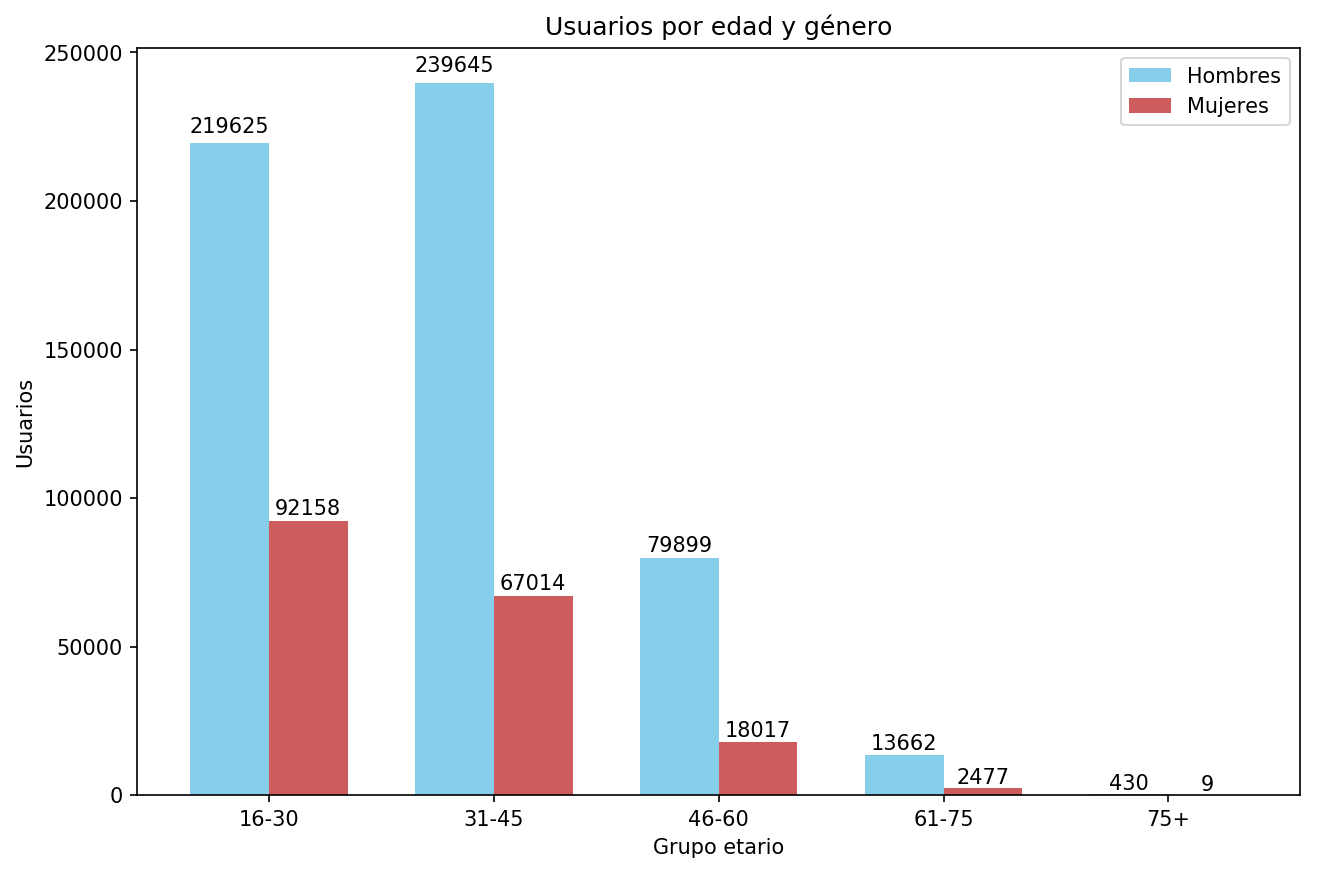

In [12]:
print(yAxisM)
print(yAxisF)
print(xAxis)

ind = np.arange(len(xAxis))
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6.6), dpi = 150)
rects1 = ax.bar(ind - width/2, yAxisM, width, color='SkyBlue', label='Hombres')
rects2 = ax.bar(ind + width/2, yAxisF, width, color='IndianRed', label='Mujeres')

ax.set_xticks(ind)
ax.set_xticklabels(xAxis)
ax.set_title("Usuarios por edad y género")
ax.set_xlabel("Grupo etario")
ax.set_ylabel("Usuarios")
ax.legend()
autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()